In [1]:
%matplotlib inline

import sys
sys.path.append('../python/')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp
import cdr
import json
import os.path
from scipy.spatial.distance import cosine
from pandas.io.json import json_normalize
from scipy.spatial import distance
imp.reload(cdr)
import numpy as np
import fastcluster as fc
from pylab import *

from scipy.cluster import hierarchy

print ("Libraries loaded")



Libraries loaded


In [2]:
cdr = pd.read_csv('../../data/CDR/hash/0727_region_time.csv')
cdr.head()
# cdr = cdr[['adjusted_callIn', 'adjusted_callOut', 'adjusted_internet', 'adjusted_smsIn', 'adjusted_smsOut', 'region_id', 'unique_time']]

,Unnamed: 0,adjusted_callIn,adjusted_callOut,adjusted_internet,adjusted_smsIn,adjusted_smsOut,region_id,unique_time
0,110100,2412.711823,2472.614335,122913.898747,4434.214535,2814.574403,1.0,110100
1,110101,1367.362762,1584.266728,105779.852430,3002.529795,2281.954450,1.0,110101
2,110102,727.482468,920.509566,87457.812869,2109.193343,1900.844820,1.0,110102
3,110103,567.559858,1013.050017,71757.012913,1745.606202,1474.216035,1.0,110103
4,110104,503.654390,708.980434,61981.363964,1286.529613,1245.327065,1.0,110104


In [3]:
internet = cdr.pivot(index='region_id', columns='unique_time', values='adjusted_internet')

In [4]:
internet.fillna(0, inplace=True)

In [5]:
internet.head()

unique_time,110100,110101,110102,110103,110104,110105,110106,110107,110108,110109,...,123114,123115,123116,123117,123118,123119,123120,123121,123122,123123
region_id,,,,,,,,,,,,,,,,,,,,,
1.0,122913.898747,105779.852430,87457.812869,71757.012913,61981.363964,54418.737100,52748.191473,56826.956148,64387.750055,80790.860883,...,119964.760295,113185.769802,105230.063898,94684.450210,78995.029808,67673.582237,71112.222656,79955.671528,90990.525644,102567.671325
2.0,99711.994472,93397.426718,82990.339386,69282.652696,55869.288204,44489.814336,41756.117562,44618.832460,54873.751083,67117.969553,...,46759.769621,44132.866372,41654.046204,37224.568621,31895.002036,30306.138357,32249.326645,37384.214836,38888.612397,42256.169063
3.0,51573.194553,51198.675032,44537.046818,37161.661749,30849.377875,26079.045392,24329.245247,27039.391909,30472.497752,34551.684876,...,37651.651093,37186.796435,33968.651263,32892.421211,31377.882798,30495.395472,31102.981044,32018.873138,32446.706990,33138.731568
4.0,55493.152388,54003.588097,46003.547260,38231.573552,29865.727287,24151.368871,22231.353321,24667.026813,30333.700809,33317.299899,...,19988.142338,19585.880756,19681.462336,19749.617580,19220.349538,19068.255157,18724.395137,19928.609662,19356.218695,18629.357653
5.0,44933.377755,38466.803797,33144.786401,28749.978254,28670.263101,27206.212977,31097.375575,38192.143813,45037.277886,53982.661957,...,50849.256466,49726.407135,47994.652868,47723.421411,45451.869838,41390.325939,40780.162168,38640.817906,38082.760154,36285.806393


In [7]:
x = internet.as_matrix()
mean = np.mean(internet, 0)
x_prime = np.zeros(shape=(85,mean.count()))

In [8]:
for i in range(0, 85):
    x_prime[i] = x[i] - mean
    
x_prime = np.transpose(x_prime)
xpp = pd.DataFrame(x_prime)
len(x_prime)

1464

In [11]:
corr = xpp.corr()
correlations_array = np.asarray(corr)

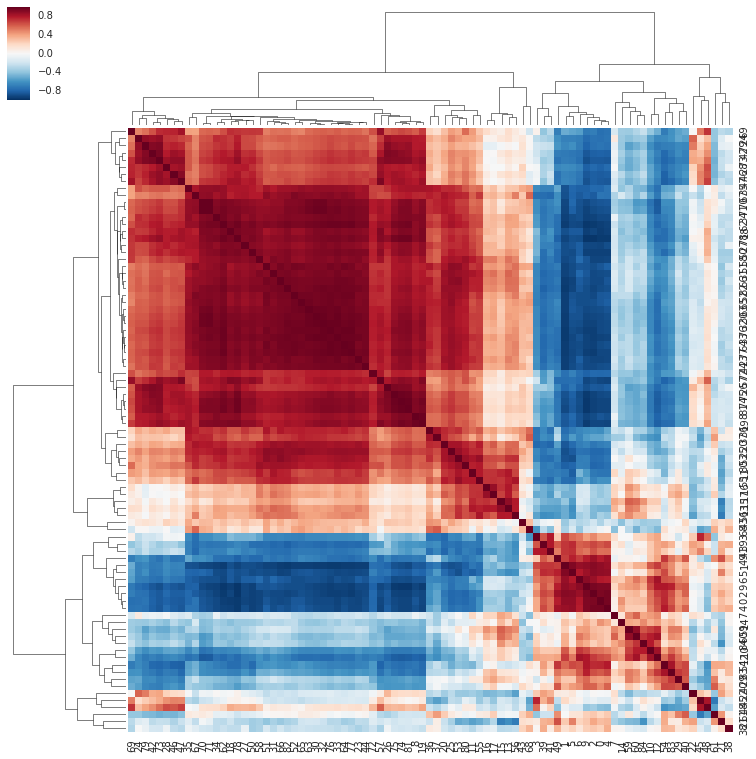

In [12]:

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(corr, row_linkage=row_linkage, col_linkage=col_linkage, method="average",
               figsize=(13, 13))

In [13]:
cdrr = pd.read_csv('../../data/CDR/hash/cdr-internet-clusters.csv')

In [14]:
xpp = xpp.T


In [17]:
xpp.index = xpp.index + 1

cdrr.index = cdrr.cluster


cluster1 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 1])].mean()
cluster2 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 2])].mean()
cluster3 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 3])].mean()
cluster4 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 4])].mean()
cluster5 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 5])].mean()
cluster6 = xpp[xpp.index.isin(cdrr.region[cdrr.index == 6])].mean()

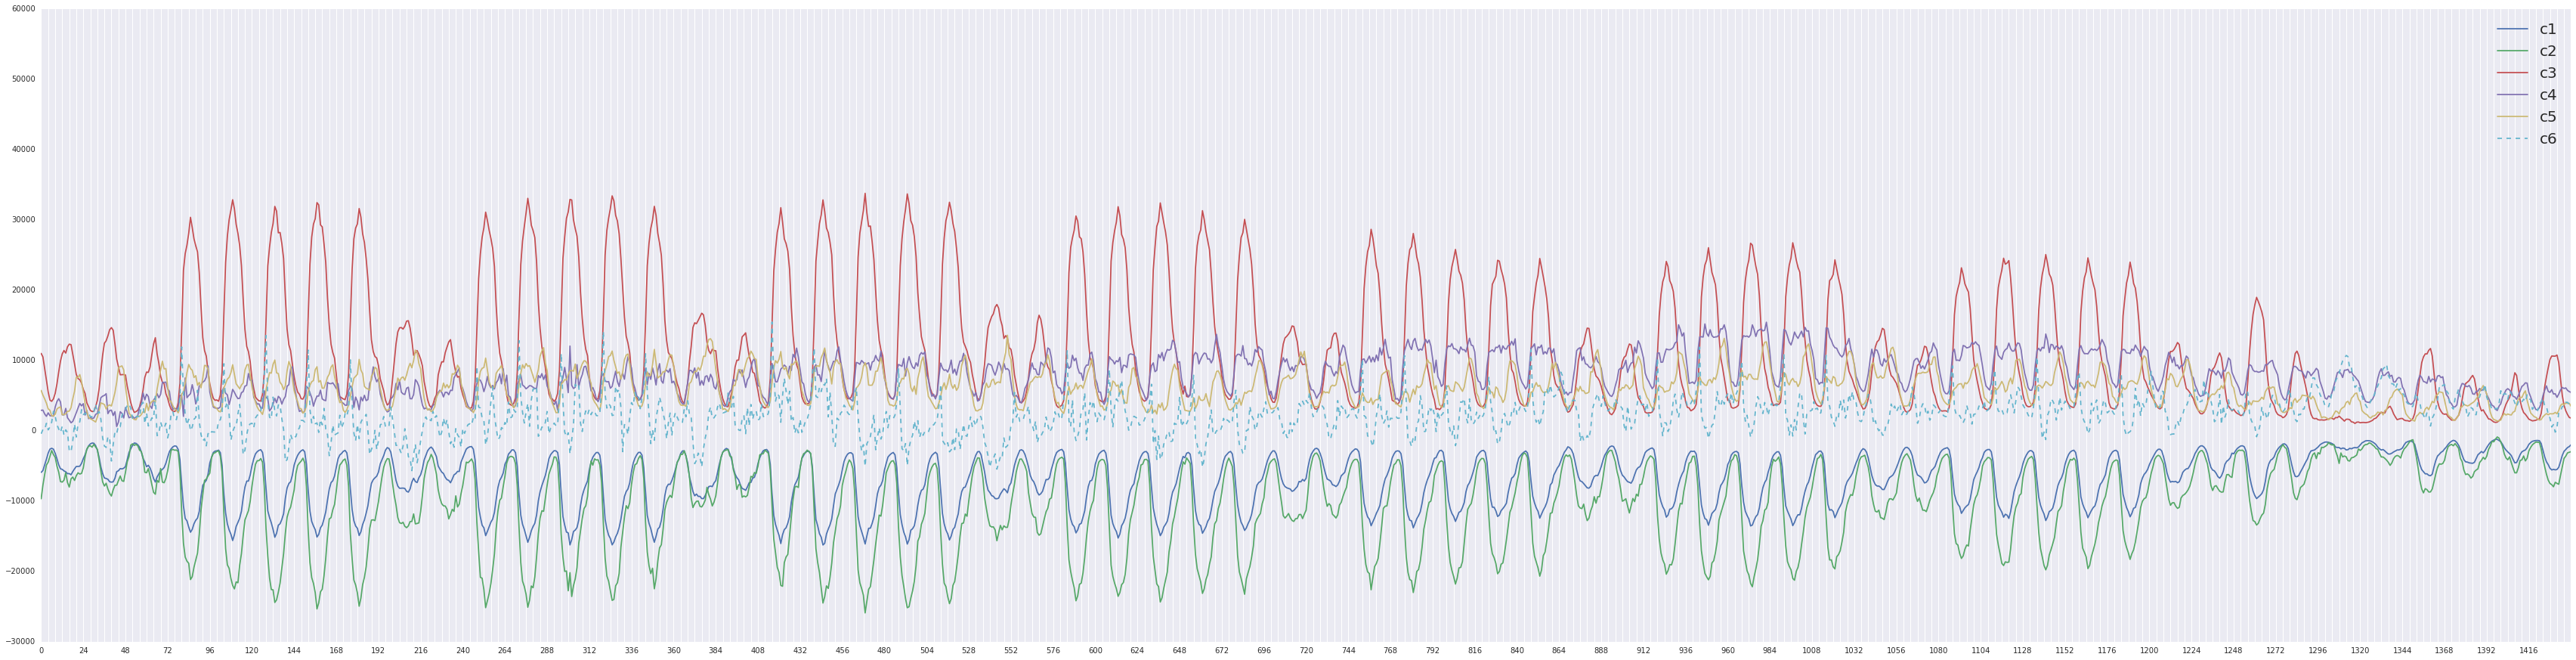

In [18]:
# November, first one week


x_range = 24*60

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , -30000, 60000])

ax.plot(cluster1, label="c1")
ax.plot(cluster2, label="c2")
ax.plot(cluster3, label="c3")
ax.plot(cluster4, label="c4")
ax.plot(cluster5, label="c5")
ax.plot(cluster6, ls = '--',label="c6")
ax.legend(prop={'size':20})



In [19]:
fig.savefig('internet_graph.png')

In [21]:
m = pd.DataFrame(mean)
m.index = range(0,1464)

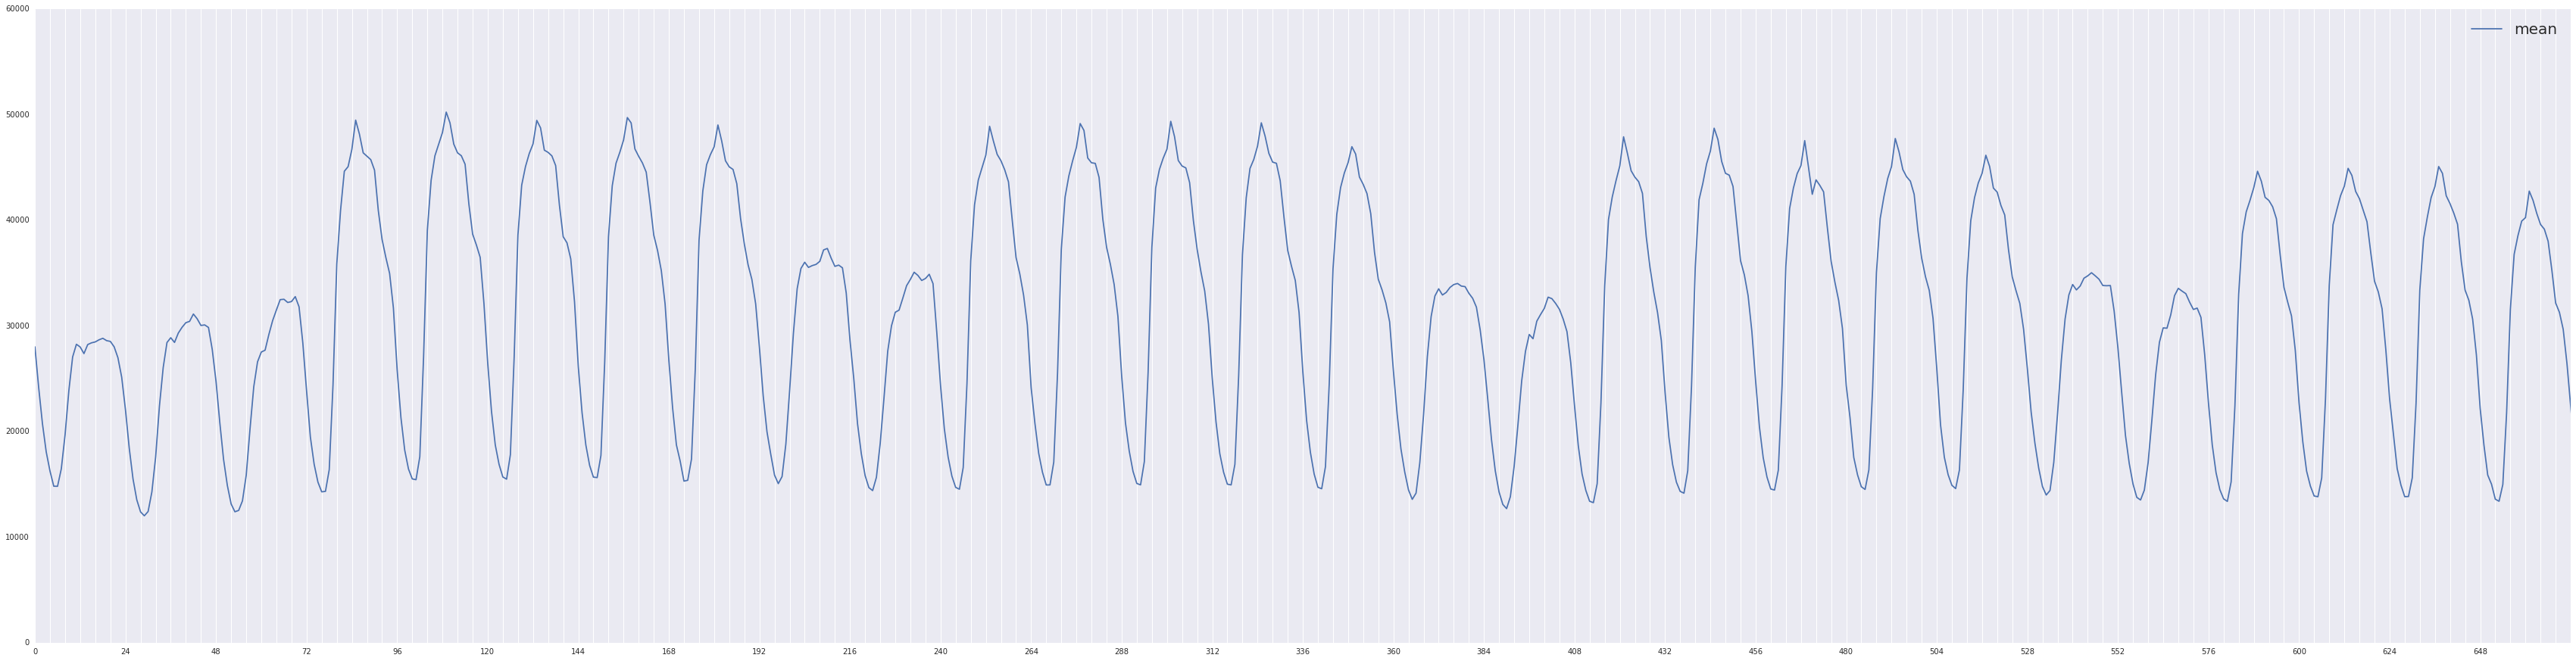

In [22]:
x_range = 24*28

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , 0, 60000])

ax.plot(m, label="mean")

ax.legend(prop={'size':20})

In [130]:
fig.savefig('mean.png')

# CALL IN

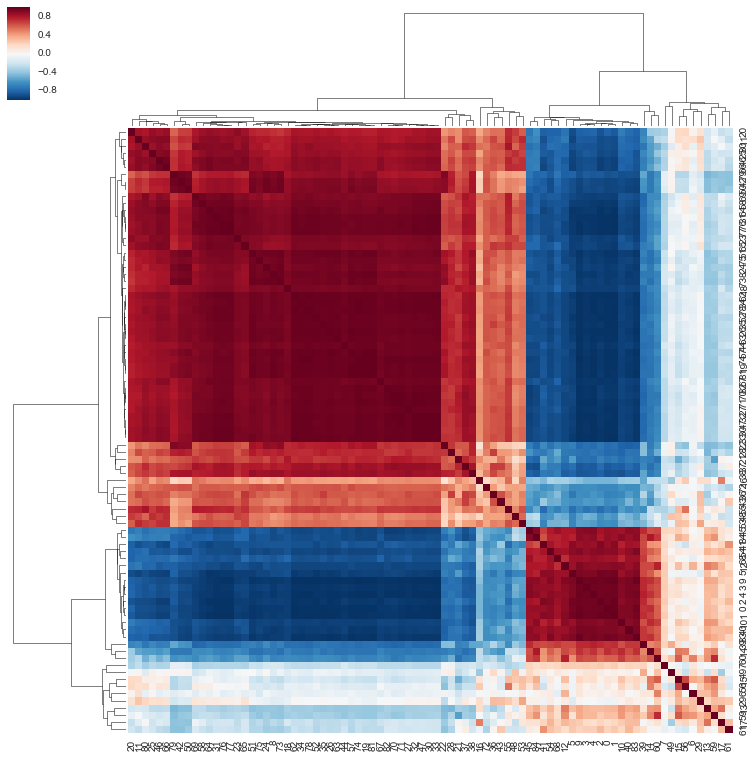

In [105]:
callin = cdr.pivot(index='region_id', columns='time', values='adjusted_callOut')
callin.fillna(0, inplace=True)
x = callin.as_matrix()
mean = np.mean(callin, 0)
x_prime = np.zeros(shape=(85,mean.count()))

for i in range(0, 85):
    x_prime[i] = x[i] - mean
    
x_prime = np.transpose(x_prime)
xpp = pd.DataFrame(x_prime)

corr = xpp.corr()
correlations_array = np.asarray(corr)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(corr, row_linkage=row_linkage, col_linkage=col_linkage, method="average",
               figsize=(13, 13))




In [ ]:
#GRAPHE
x_range = 24*28

fig = plt.figure(figsize=(60,15))
ax = fig.add_subplot(1,1,1)
major_ticks = np.arange(0, x_range, 24)                                              
minor_ticks = np.arange(0, x_range, 4) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

ax.axis([0, x_range , -30000, 60000])

ax.plot(cluster1, label="c1")
ax.plot(cluster2, label="c2")
ax.plot(cluster3, label="c3")
ax.plot(cluster4, label="c4")
ax.plot(cluster5, label="c5")
ax.plot(cluster6, ls = '--',label="c6")
ax.legend(prop={'size':20})



In [ ]:
# drawing original graphs
# xx = np.transpose(x)
# xx = pd.DataFrame(xx)
# xx = xx.T
# xx.index = xx.index + 1

# cdrr.index = cdrr.cluster


# cluster1 = xx.mean()

# x_range = 24*60

# fig = plt.figure(figsize=(60,15))
# ax = fig.add_subplot(1,1,1)
# major_ticks = np.arange(0, x_range, 24)                                              
# minor_ticks = np.arange(0, x_range, 4) 
# ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
                                       

# # and a corresponding grid                                                       

# ax.grid(which='both')                                                            

# ax.axis([576, 720 , 0, 90000])

# ax.plot(cluster1, label="c1")
# ax.legend(prop={'size':20})
# fig.savefig('original.png')